In [54]:
!pip install pytest-benchmark

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pickle
import pytest

# 1. Создаем наборы данных

In [56]:
x_1 = np.linspace(0, 10, 300)
y_1  = x_1 + np.random.random(300)*2 - 1
df_1 = pd.DataFrame(x_1, columns=['feature'])

x_2 = np.linspace(0, 10, 300)
y_2  = x_2 + np.random.random(300)*2 - 1
df_2 = pd.DataFrame(x_2, columns=['feature'])

x_3 = np.linspace(0, 10, 300)
y_3  = x_3 + np.random.random(300)*2 - 1
df_3 = pd.DataFrame(x_3, columns=['feature'])

**Видуализация**

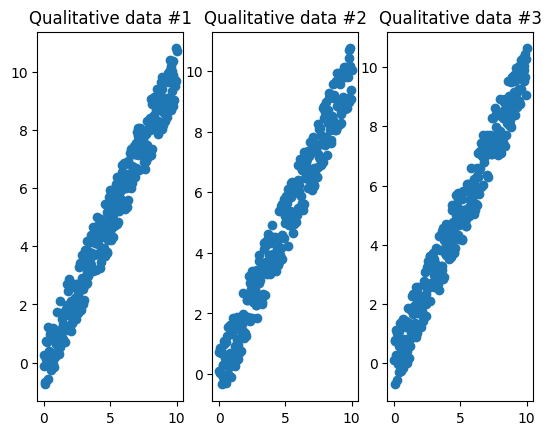

In [57]:
# Для df_1
plt.subplot(1, 3, 1)  # Создаем первый subplot
plt.scatter(x_1, y_1)
plt.title("Qualitative data #1")

# Для df_2
plt.subplot(1, 3, 2)  # Создаем второй subplot
plt.scatter(x_2, y_2)
plt.title("Qualitative data #2")

# Для df_3
plt.subplot(1, 3, 3)  # Создаем третий subplot
plt.scatter(x_3, y_3)
plt.title("Qualitative data #3")

# plt.tight_layout()  # Для автоматического управления перекрытием подзаголовков
plt.show()

**Данные низкого качества**

In [58]:
p_x = np.linspace(0, 100, 300)
p_y  = p_x + np.random.random(300)*20 - 10
p_y[10:30] *= 2
p_y[60:80] /= 2

df_p = pd.DataFrame(p_x, columns=['feature'])

**Визуализация**

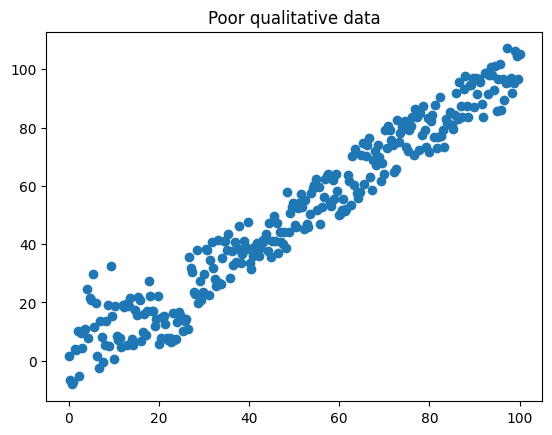

In [59]:
plt.scatter(p_x, p_y)
plt.title("Poor qualitative data")
plt.show()

# 2. Модель

In [60]:
def process(df, y):
    # scale data
    scaler = StandardScaler()
    X = scaler.fit_transform(df)

    # Create and fit model
    model = LinearRegression()
    model.fit(X, y)
    return model

In [61]:
model = process(df_1, y_1)

# 3. Сохранение данных

In [62]:
pickle.dump(model, open("model.pkl", 'wb'))

df_1.to_csv("df1.csv", index=False)
pd.DataFrame(y_1, columns=['target']).to_csv("target1.csv", index=False)

df_2.to_csv("df2.csv", index=False)
pd.DataFrame(y_2, columns=['target']).to_csv("target2.csv", index=False)

df_3.to_csv("df3.csv", index=False)
pd.DataFrame(y_3, columns=['target']).to_csv("target3.csv", index=False)

df_p.to_csv("dfp.csv", index=False)
pd.DataFrame(p_y, columns=['target']).to_csv("targetp.csv", index=False)


# СЛЕДУЮЩИЕ СТРОКИ УДАЛИТЬ

In [63]:
def get_metrics(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = mean_squared_error(true_values, predicted_values, squared=False)
    return mae, rmse

In [64]:
def print_metrics(mae, rmse):
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)

In [65]:
preds = model.predict(df_1)
mae, rmse = get_metrics(y_1, preds)
print_metrics(mae, rmse)

Mean Absolute Error: 14.727362803810077
Root Mean Squared Error: 15.761009253203918


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [66]:
preds = model.predict(df_2)
mae, rmse = get_metrics(y_2, preds)
print_metrics(mae, rmse)

Mean Absolute Error: 14.709552484388471
Root Mean Squared Error: 15.761505287246013


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [67]:
preds = model.predict(df_3)
mae, rmse = get_metrics(y_3, preds)
print_metrics(mae, rmse)

Mean Absolute Error: 14.696827661130126
Root Mean Squared Error: 15.754669456376616


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [68]:
preds = model.predict(df_p)
mae, rmse = get_metrics(p_y, preds)
print_metrics(mae, rmse)

Mean Absolute Error: 102.84214258294566
Root Mean Squared Error: 117.12364502539995


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [69]:
%%writefile pytest_benchmark_example.py
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

model =  pickle.load(open("model.pkl", 'rb'))
df_1 = pd.read_csv("df1.csv")
df_2 = pd.read_csv("df2.csv")
df_3 = pd.read_csv("df3.csv")
y_1 = pd.read_csv("target1.csv")
y_2 = pd.read_csv("target2.csv")
y_3 = pd.read_csv("target3.csv")

df_p = pd.read_csv("dfp.csv")
y_p = pd.read_csv("targetp.csv")


def get_metrics(target, predictions):
    MAE = mean_absolute_error(target, predictions)
    RMSE = np.sqrt(mean_squared_error(target, predictions))
    return MAE, RMSE


def print_metrics(MAE, RMSE):
    print(f"MAE : {MAE:.4f}")
    print(f"RMSE : {RMSE:.4f}")


def test_second_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_2, rmse_2 = get_metrics(y_2, model.predict(df_2))
    assert abs(mae_standard - mae_2) < 1 and abs(rmse_standard - rmse_2) < 1


def test_third_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_3, rmse_3 = get_metrics(y_3, model.predict(df_3))
    assert abs(mae_standard - mae_3) < 1 and abs(rmse_standard - rmse_3) < 1


def test_poor_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_p, rmse_p = get_metrics(y_p, model.predict(df_p))
    assert abs(mae_standard - mae_p) > 10 and abs(rmse_standard - rmse_p) > 10

Overwriting pytest_benchmark_example.py


In [70]:
!pytest -v pytest_benchmark_example.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
benchmark: 4.0.0 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: /content
plugins: benchmark-4.0.0, anyio-3.7.1
collected 3 items                                                                                  

pytest_benchmark_example.py::test_second_model PASSED                                        [ 33%]
pytest_benchmark_example.py::test_third_model PASSED                                         [ 66%]
pytest_benchmark_example.py::test_poor_model PASSED                                          [100%]

========================================= warnings summary =========================================
pytest_benchmark_example.py::test_second_model
pytest_benc